In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro
pd.set_option("play.max_rows", 15)
#Dữ liệu thư viện đã được tải lên jupyter dưới dạng csv
data = pd.read_csv('C:\\Users\\phamt\\Downloads\\7 sf_library.csv')

In [2]:
data

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Provided Email Address,Year Patron Registered
0,0,Adult,838,382,55 to 59 years,r3,Richmond,Jun,2023.0,True,2003
1,0,Adult,1,0,25 to 34 years,r3,Richmond,Jun,2023.0,True,2017
2,0,Adult,1007,528,60 to 64 years,s7,Sunset,Jul,2022.0,True,2003
3,0,Adult,4806,3981,45 to 54 years,m6,Mission,Jun,2023.0,True,2003
4,3,Senior,46,27,65 to 74 years,m6,Mission,May,2023.0,True,2019
...,...,...,...,...,...,...,...,...,...,...,...
63988,0,Adult,0,0,25 to 34 years,s7,Sunset,Jul,2023.0,True,2023
63989,2,Teen,424,37,10 to 19 years,s7,Sunset,Jul,2023.0,True,2011
63990,0,Adult,393,13,10 to 19 years,s7,Sunset,Apr,2022.0,True,2004
63991,0,Adult,1140,545,10 to 19 years,s7,Sunset,Apr,2021.0,True,2008


In [3]:
# Kiểm tra giá trị thiếu trong dữ liệu
data.isnull().sum()

Patron Type Code               0
Patron Type Definition         0
Total Checkouts                0
Total Renewals                 0
Age Range                     21
Home Library Code              0
Home Library Definition        0
Circulation Active Month    2540
Circulation Active Year     2540
Provided Email Address         0
Year Patron Registered         0
dtype: int64

In [4]:
# Định nghĩa hằng số toàn cục cho các giá trị thiếu
AGE_RANGE_DEFAULT = 'Unknown'

# Điền giá trị thiếu trong cột 'Age Range' bằng hằng số AGE_RANGE_DEFAULT
data['Age Range'] = data['Age Range'].fillna(AGE_RANGE_DEFAULT)

# Điền giá trị thiếu trong cột 'Circulation Active Month' bằng "Most Probable Value"
data['Circulation Active Month'] = data['Circulation Active Month'].fillna(data['Circulation Active Month'].mode()[0])

# Điền giá trị thiếu trong cột 'Circulation Active Year' bằng "Most Probable Value"
data['Circulation Active Year'] = data['Circulation Active Year'].fillna(data['Circulation Active Year'].mode()[0])

data.isnull().sum()


Patron Type Code            0
Patron Type Definition      0
Total Checkouts             0
Total Renewals              0
Age Range                   0
Home Library Code           0
Home Library Definition     0
Circulation Active Month    0
Circulation Active Year     0
Provided Email Address      0
Year Patron Registered      0
dtype: int64

In [5]:
#kích thước của DataFrame
print(data.shape)
print(data.columns)

(63993, 11)
Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Provided Email Address',
       'Year Patron Registered'],
      dtype='object')


In [6]:
#Kiểu dữ liệu của cột
print(data.dtypes)

Patron Type Code              int64
Patron Type Definition       object
Total Checkouts               int64
Total Renewals                int64
Age Range                    object
Home Library Code            object
Home Library Definition      object
Circulation Active Month     object
Circulation Active Year     float64
Provided Email Address         bool
Year Patron Registered        int64
dtype: object


In [7]:
# Chuyển đổi kiểu dữ liệu
# Chuyển đổi 'Circulation Active Year' thành số nguyên nếu nó chưa phải
if not pd.api.types.is_integer_dtype(data['Circulation Active Year']):
    data['Circulation Active Year'] = data['Circulation Active Year'].fillna(0).astype(int)



# Đảm bảo không có giá trị âm trong các cột 'Total Checkouts' và 'Total Renewals'
data['Total Checkouts'] = data['Total Checkouts'].apply(lambda x: x if x >= 0 else 0)
data['Total Renewals'] = data['Total Renewals'].apply(lambda x: x if x >= 0 else 0)

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print(data.dtypes)

Patron Type Code             int64
Patron Type Definition      object
Total Checkouts              int64
Total Renewals               int64
Age Range                   object
Home Library Code           object
Home Library Definition     object
Circulation Active Month    object
Circulation Active Year      int64
Provided Email Address        bool
Year Patron Registered       int64
dtype: object


In [8]:
# Kiểm tra các cột kiểu 'object'
object_columns = data.select_dtypes(include=['object']).columns

# Kiểm tra số lượng giá trị duy nhất trong mỗi cột kiểu 'object'
for col in object_columns:
    print(f"Unique values in '{col}': {data[col].nunique()}")

    # In ra các giá trị duy nhất để kiểm tra
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("-" * 50)


Unique values in 'Patron Type Definition': 4
Unique values in 'Patron Type Definition':
['Adult' 'Senior' 'Teen' 'Juvenile']
--------------------------------------------------
Unique values in 'Age Range': 11
Unique values in 'Age Range':
['55 to 59 years' '25 to 34 years' '60 to 64 years' '45 to 54 years'
 '65 to 74 years' '10 to 19 years' '0 to 9 years' '20 to 24 years'
 '35 to 44 years' '75 years and over' 'Unknown']
--------------------------------------------------
Unique values in 'Home Library Code': 13
Unique values in 'Home Library Code':
['r3' 's7' 'm6' 'c2' 'm6aaa' 'm8jaa' 's7j' 'c2aaa' 'm6abu' 'm6j' 'r3aaa'
 'r3j' 's7aaa']
--------------------------------------------------
Unique values in 'Home Library Definition': 4
Unique values in 'Home Library Definition':
['Richmond' 'Sunset' 'Mission' 'Chinatown']
--------------------------------------------------
Unique values in 'Circulation Active Month': 12
Unique values in 'Circulation Active Month':
['Jun' 'Jul' 'May' 'Feb' 'Ma

In [9]:
#Thay thế các giá trị không hợp lệ trong 'Age Range' bằng "Unknown"
valid_age_ranges = ['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', 
                    '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']

data['Age Range'] = data['Age Range'].apply(lambda x: x if x in valid_age_ranges else 'Unknown')
# Thay thế giá trị âm trong 'Total Checkouts' và 'Total Renewals' bằng 0
data['Total Checkouts'] = data['Total Checkouts'].apply(lambda x: x if x >= 0 else 0)
data['Total Renewals'] = data['Total Renewals'].apply(lambda x: x if x >= 0 else 0)

# Thay thế các giá trị không hợp lệ trong 'Circulation Active Month' bằng "Unknown"
valid_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Circulation Active Month'] = data['Circulation Active Month'].apply(lambda x: x if x in valid_months else 'Unknown')

# Thay thế giá trị âm trong 'Total Checkouts' và 'Total Renewals' bằng 0
data['Total Checkouts'] = data['Total Checkouts'].apply(lambda x: x if x >= 0 else 0)
data['Total Renewals'] = data['Total Renewals'].apply(lambda x: x if x >= 0 else 0)


Checking distribution for column: Total Checkouts


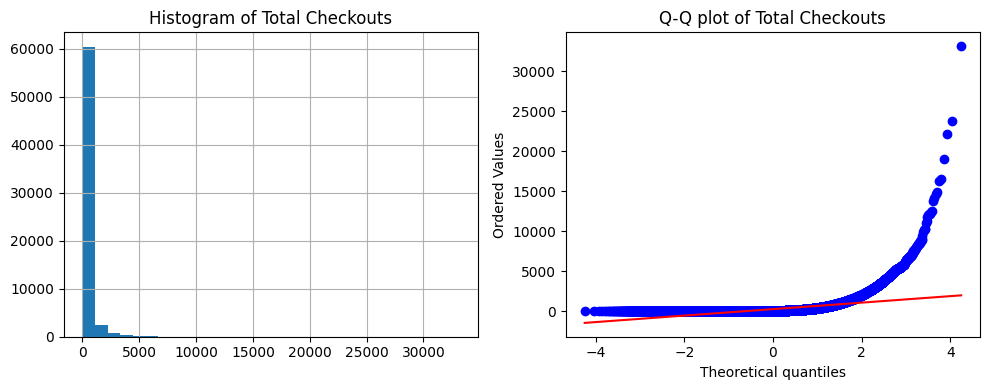

D:\SourceCode\python\pythonProject\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63993.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test p-value: 6.557330243781156e-156
Skewness: 9.437783790521657, Kurtosis: 211.98997859611637
-> The column 'Total Checkouts' does NOT follow a normal distribution (Shapiro-Wilk test).
--------------------------------------------------
Checking distribution for column: Total Renewals


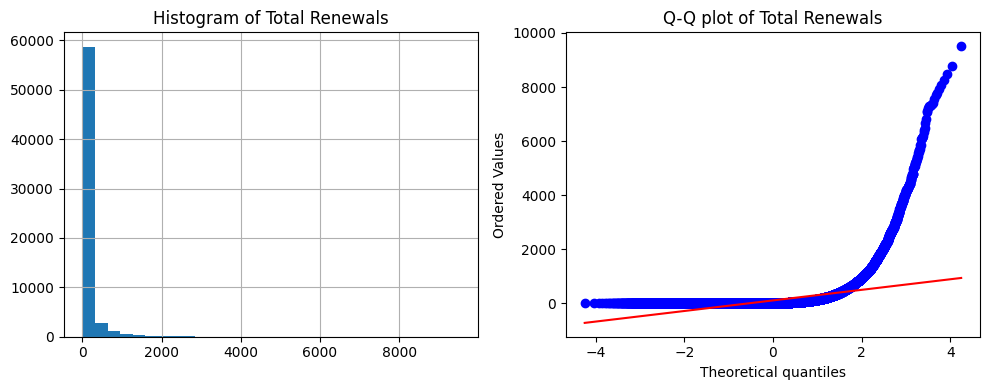

Shapiro-Wilk test p-value: 3.23577449289323e-159
Skewness: 9.117578462779653, Kurtosis: 126.5083391425166
-> The column 'Total Renewals' does NOT follow a normal distribution (Shapiro-Wilk test).
--------------------------------------------------


In [10]:
# Kiểm tra phân phối cho từng cột số
columns_to_check = ['Total Checkouts', 'Total Renewals']
for column in columns_to_check:
    print(f"Checking distribution for column: {column}")

    # 1. Vẽ histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    data[column].hist(bins=30)
    plt.title(f"Histogram of {column}")

    # 2. Vẽ Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {column}")
    plt.tight_layout()
    plt.show()

    # 3. Kiểm tra Shapiro-Wilk test
    stat, p_value = shapiro(data[column].dropna())  # Loại bỏ NaN để tránh lỗi
    print(f"Shapiro-Wilk test p-value: {p_value}")

    # 4. Tính độ lệch và độ nhọn
    skew_value = skew(data[column].dropna())
    kurt_value = kurtosis(data[column].dropna())
    print(f"Skewness: {skew_value}, Kurtosis: {kurt_value}")

    # Xem xét kết quả
    if p_value < 0.05:
        print(f"-> The column '{column}' does NOT follow a normal distribution (Shapiro-Wilk test).")
    else:
        print(f"-> The column '{column}' may follow a normal distribution (Shapiro-Wilk test).")

    print('-' * 50)

In [11]:
# Thay thế ngoại lệ trong 'Total Checkouts' bằng giá trị trung bình
Q1 = data['Total Checkouts'].quantile(0.25)
Q3 = data['Total Checkouts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_checkouts = Q1 - 1.5 * IQR
upper_bound_checkouts = Q3 + 1.5 * IQR
mean_checkouts = data['Total Checkouts'].mean()

data['Total Checkouts'] = data['Total Checkouts'].apply(
    lambda x: mean_checkouts if x < lower_bound_checkouts or x > upper_bound_checkouts else x
)

# Thay thế ngoại lệ trong 'Total Renewals' bằng giá trị trung bình
Q1_renewals = data['Total Renewals'].quantile(0.25)
Q3_renewals = data['Total Renewals'].quantile(0.75)
IQR_renewals = Q3_renewals - Q1_renewals
lower_bound_renewals = Q1_renewals - 1.5 * IQR_renewals
upper_bound_renewals = Q3_renewals + 1.5 * IQR_renewals
mean_renewals = data['Total Renewals'].mean()

data['Total Renewals'] = data['Total Renewals'].apply(
    lambda x: mean_renewals if x < lower_bound_renewals or x > upper_bound_renewals else x
)

In [12]:
# Check for duplicates
print(data.duplicated().sum())

# Drop duplicates
data = data.drop_duplicates()

12646


In [13]:

stats = data.describe()
stats = stats.round(0).astype(int)
print(stats)


       Patron Type Code  Total Checkouts  Total Renewals  \
count             51347            51347           51347   
mean                  1               93              37   
std                   1              110              45   
min                   0                0               0   
25%                   0                6               2   
50%                   0               38              15   
75%                   1              170              65   
max                   3              444             167   

       Circulation Active Year  Year Patron Registered  
count                    51347                   51347  
mean                      2022                    2013  
std                          2                       6  
min                       2004                    2003  
25%                       2022                    2009  
50%                       2023                    2014  
75%                       2023                    2018  
max

In [14]:
# In ra các kết quả để kiểm tra
print("After cleaning:")
print(data[['Total Checkouts', 'Total Renewals', 'Circulation Active Month']].head())

After cleaning:
   Total Checkouts  Total Renewals Circulation Active Month
0       241.465582        108.8307                      Jun
1         1.000000          0.0000                      Jun
2       241.465582        108.8307                      Jul
3       241.465582        108.8307                      Jun
4        46.000000         27.0000                      May


In [15]:
# Kiểm tra kiểu dữ liệu của các cột
print("Data types:")
print(data[['Patron Type Code', 'Patron Type Definition', 'Home Library Code', 
           'Home Library Definition', 'Provided Email Address', 'Year Patron Registered']].dtypes)

# Kiểm tra giá trị thiếu (missing values) trong các cột
print("\nMissing values (NaN count):")
print(data[['Patron Type Code', 'Patron Type Definition', 'Home Library Code', 
           'Home Library Definition', 'Provided Email Address', 'Year Patron Registered']].isnull().sum())

# Kiểm tra các giá trị duy nhất trong các cột
print("\nUnique values in each column:")
for col in ['Patron Type Code', 'Patron Type Definition', 'Home Library Code', 
            'Home Library Definition', 'Provided Email Address', 'Year Patron Registered']:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("-" * 50)

# Kiểm tra các giá trị trong 'Patron Type Code' để xác định xem có giá trị không hợp lệ không
print("\nUnique values in 'Patron Type Code' (check for invalid values):")
print(data['Patron Type Code'].unique())

# Kiểm tra các giá trị trong 'Year Patron Registered' (năm đăng ký hợp lệ)
print("\nUnique values in 'Year Patron Registered' (check for valid years):")
print(data['Year Patron Registered'].unique())

# Kiểm tra các giá trị trong 'Provided Email Address' (nếu có giá trị hợp lệ hoặc boolean)
print("\nUnique values in 'Provided Email Address' (check for valid email status):")
print(data['Provided Email Address'].unique())

# Kiểm tra các giá trị trong 'Home Library Code' (nếu có giá trị hợp lệ)
print("\nUnique values in 'Home Library Code' (check for valid library codes):")
print(data['Home Library Code'].unique())


Data types:
Patron Type Code            int64
Patron Type Definition     object
Home Library Code          object
Home Library Definition    object
Provided Email Address       bool
Year Patron Registered      int64
dtype: object

Missing values (NaN count):
Patron Type Code           0
Patron Type Definition     0
Home Library Code          0
Home Library Definition    0
Provided Email Address     0
Year Patron Registered     0
dtype: int64

Unique values in each column:
Unique values in 'Patron Type Code':
[0 3 2 1]
--------------------------------------------------
Unique values in 'Patron Type Definition':
['Adult' 'Senior' 'Teen' 'Juvenile']
--------------------------------------------------
Unique values in 'Home Library Code':
['r3' 's7' 'm6' 'c2' 'm6aaa' 'm8jaa' 's7j' 'c2aaa' 'm6abu' 'm6j' 'r3aaa'
 'r3j' 's7aaa']
--------------------------------------------------
Unique values in 'Home Library Definition':
['Richmond' 'Sunset' 'Mission' 'Chinatown']
----------------------------

In [16]:
unique_mapping = data[['Home Library Code', 'Home Library Definition']].drop_duplicates()
print(unique_mapping)



      Home Library Code Home Library Definition
0                    r3                Richmond
2                    s7                  Sunset
3                    m6                 Mission
6                    c2               Chinatown
3895              m6aaa                 Mission
4950              m8jaa                 Mission
5099                s7j                  Sunset
7045              c2aaa               Chinatown
19582             m6abu                 Mission
19583               m6j                 Mission
35801             r3aaa                Richmond
35803               r3j                Richmond
51989             s7aaa                  Sunset


In [17]:
# Bảng ánh xạ giữa mã thư viện và tên thư viện
library_mapping = {
    'r3': 'Richmond',
    's7': 'Sunset',
    'm6': 'Mission',
    'c2': 'Chinatown'
}

# Bước 1: Chuẩn hóa mã thư viện, thay thế 'm8jaa' thành 'm6' (hoặc bạn có thể xử lý thêm các mã khác nếu cần)
data.loc[:, 'Home Library Code'] = data['Home Library Code'].replace({'m8jaa': 'm6'})

# Bước 2: Chuẩn hóa cột Home Library Code (chuyển về chữ thường để thống nhất)
data.loc[:, 'Home Library Code'] = data['Home Library Code'].str.lower()

# Ánh xạ mã thư viện thành tên thư viện đầy đủ
data.loc[:, 'Home Library Full Name'] = data['Home Library Code'].map(library_mapping)

# Xử lý các giá trị không hợp lệ (nếu có)
data.loc[:, 'Home Library Full Name'] = data['Home Library Full Name'].fillna('Unknown')

# Bước 5: Nếu bạn muốn chỉ giữ lại các mã hợp lệ (r3, s7, m6, c2)
valid_codes = ['r3', 's7', 'm6', 'c2']
data = data[data['Home Library Code'].isin(valid_codes)]

# In kết quả
print(data[['Home Library Code', 'Home Library Full Name']].drop_duplicates())

# Kiểm tra các giá trị không hợp lệ
print(data[data['Home Library Full Name'] == 'Unknown'])

  Home Library Code Home Library Full Name
0                r3               Richmond
2                s7                 Sunset
3                m6                Mission
6                c2              Chinatown
Empty DataFrame
Columns: [Patron Type Code, Patron Type Definition, Total Checkouts, Total Renewals, Age Range, Home Library Code, Home Library Definition, Circulation Active Month, Circulation Active Year, Provided Email Address, Year Patron Registered, Home Library Full Name]
Index: []


C:\Users\phamt\AppData\Local\Temp\ipykernel_22180\3245554579.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Home Library Full Name'] = data['Home Library Code'].map(library_mapping)


In [18]:
# Kiểm tra các giá trị trong cột 'Age Range'
print(data['Age Range'].unique())


['55 to 59 years' '25 to 34 years' '60 to 64 years' '45 to 54 years'
 '65 to 74 years' '10 to 19 years' '0 to 9 years' '20 to 24 years'
 '35 to 44 years' '75 years and over' 'Unknown']


In [19]:
# Định nghĩa danh sách các khoảng tuổi hợp lệ
valid_age_ranges = ['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', 
                    '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', 
                    '65 to 74 years', '75 years and over']

# Định nghĩa hàm chuẩn hóa
def normalize_age_range(age_range):
    if age_range == 'Unknown':
        return None  # Nếu là 'Unknown' thì trả về None hoặc có thể thay đổi theo yêu cầu
    
    # Tạo từ điển ánh xạ khoảng tuổi sang giá trị số trung bình của nhóm tuổi
    age_mapping = {
        '0 to 9 years': 5, 
        '10 to 19 years': 15, 
        '20 to 24 years': 22, 
        '25 to 34 years': 30,
        '35 to 44 years': 40, 
        '45 to 54 years': 50, 
        '55 to 59 years': 57, 
        '60 to 64 years': 62, 
        '65 to 74 years': 70, 
        '75 years and over': 75
    }
    
    # Trả về giá trị đã chuẩn hóa
    return age_mapping.get(age_range, None)  # Nếu không khớp với nhóm tuổi nào thì trả về None

# Áp dụng chuẩn hóa cho cột 'Age Range'
data['Normalized Age'] = data['Age Range'].apply(normalize_age_range)

# Loại bỏ các dòng có 'Unknown' để tránh ảnh hưởng đến việc tính Z-score
data = data[data['Normalized Age'].notna()]

# Tính Z-score cho cột 'Normalized Age'
mean_age = data['Normalized Age'].mean()  # Tính giá trị trung bình
std_age = data['Normalized Age'].std()  # Tính độ lệch chuẩn

# Áp dụng công thức Z-score
data['Z-Score Age'] = (data['Normalized Age'] - mean_age) / std_age

# Hiển thị kết quả
print(data[['Age Range', 'Normalized Age', 'Z-Score Age']])

            Age Range  Normalized Age  Z-Score Age
0      55 to 59 years            57.0     0.999019
1      25 to 34 years            30.0    -0.358629
2      60 to 64 years            62.0     1.250435
3      45 to 54 years            50.0     0.647036
4      65 to 74 years            70.0     1.652701
...               ...             ...          ...
63987  55 to 59 years            57.0     0.999019
63989  10 to 19 years            15.0    -1.112877
63990  10 to 19 years            15.0    -1.112877
63991  10 to 19 years            15.0    -1.112877
63992  45 to 54 years            50.0     0.647036

[51298 rows x 3 columns]


In [21]:
data.to_csv("C:\\Users\\phamt\\Downloads\\cleaning_data.csv", index=False)  # Lưu dưới dạng CSV